### 总体程序功能
- 灰度图读取
- 输出dtype
- 输出shape
- 分离通道
- 随机亮度
- gamma变换


In [7]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('lenna.jpg')

## 仿射变换流程
- 获得img.shape rows,cols(在输出图像大小设置时候是cols,rows相反的)
- 获得两组对应的6个点，pts1 = np.float32([],[],[])-原图3个点，pts2 = np.float32([],[],[])-变换后的三个点
- getAffineTransform(pts1,pts2)
- warpAffine(img,M,(cols,rows))

### 旋转变换
- getRotationMatrix2D（旋转中心，角度，缩放尺寸）
- warpAffine（输入图片，变换矩阵，输出图片大小（不能直接用shape））

### 伽马变换程序流程
- 输入：图像，gamma
- 输出：经过伽马变换的图像
- invGamma = 1.0/gamma 对应伽马变换那个图
- 建立查找表table[]
- 对256个像素遍历
- table.append(((i/255.0) ** invGamma) * 255)
- 把table给array化，同时调整为astype为uint8
- cv2.LUT()
### 功能：
- 图片比较暗，提亮图片
- 很多看不见的细节，就可以看见了

### plt.hist()灰度直方图画法
- 通常用法：plt.hist(img的一维统计数组,bin=显示的柱数,灰度范围，绘制颜色)

### 随机亮度程序流程：
- 将图片得三个通道分离
- 设置随机数（用于生成B通道得随机值）
- 判断如果随机数等于0，那么什么都不用改变
- 判断如果大于0，那么用255减去随机数，大于255的就设置为255
    - B通道值大于限制值得设置为255
    - B通道值小于限制值得设置为原来得值加上随机值（**代码重要**）
- 对G、R做同样得操作

In [8]:
# 投影变换（需要四个点）
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp


# 伽马变换
def adjust_gamma(image,gamma=1.0):
    inv_gamma = gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** inv_gamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image,table)



# 随机亮度
def random_light_color(img):
    B,G,R = cv2.split(img)
    
    #** 随机生成-50到50之间的值
    b_rand = random.randint(-50,50)
     #** B通道
    if b_rand == 0 :
        pass
    elif b_rand > 0:
        # 保证b_rand加到像素值上不超过255
        lim = 255 - b_rand
        # B中大于lim的像素值，那么就设置为255
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        # 用0 减
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
        
        
    #** 随机生成-50到50之间的值
    g_rand = random.randint(-50,50)
     #** B通道
    if g_rand == 0 :
        pass
    elif g_rand > 0:
        # 保证b_rand加到像素值上不超过255
        lim = 255 - g_rand
        # B中大于lim的像素值，那么就设置为255
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        # 用0 减
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim ]).astype(img.dtype)
        
        
    #** 随机生成-50到50之间的值
    r_rand = random.randint(-50,50)
     #** B通道
    if r_rand == 0 :
        pass
    elif r_rand > 0:
        # 保证b_rand加到像素值上不超过255
        lim = 255 - r_rand
        # B中大于lim的像素值，那么就设置为255
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        # 用0 减
        lim = 0 - g_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim ]).astype(img.dtype)
        
    img_merge = cv2.merge((B, G, R))  
    return img_merge

## resize、plt.hist

## 主程序

D:\Program Files\Anaconda\envs\Python3.7\lib\site-packages\ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


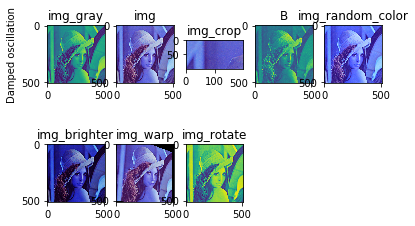

uint8
(512, 512)
(512, 512, 3)


In [9]:

#----------------------------------图像操作-----------------------------------#

# 原图读取
img = cv2.imread('lenna.jpg')

# 灰度读取
img_gray= cv2.imread('lenna.jpg',0)
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 图像分块
img_crop = img[0:100, 0:200]

# 图像通道分离
B,G,R = cv2.split(img)

# 随机改变颜色
random_light_color = random_light_color(img)

# Gamma Correction
img_brighter = adjust_gamma(img, 2)

# 投影变换
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])

# 仿射变换
rows,cols,unused = img.shape

pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
img_Affine = cv2.warpAffine(img, M, (cols, rows))


# 旋转变换
## 获得旋转变换的矩阵
M = cv2.getRotationMatrix2D((img.shape[1] / 2,img.shape[0] / 2),30,0.5)
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

img_brighter = adjust_gamma(img,2)
## 画出灰度直方图
# flatten 所有通道的所有的像素的列表化为一维向量512*512*3
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'black')

## resize(img,(size))调节尺寸
img_small_brighter = cv2.resize(img_brighter,(int(img_brighter.shape[0] * 0.5),int(img_brighter.shape[0] * 0.5)))

## YUV用途总结
img_yuv = cv2.cvtColor(img_small_brighter,cv2.COLOR_BGR2YUV)

# 直方图均衡化？？
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)




#-----------------------------------图像操作-----------------------------------#



#---------------------------------plt Display---------------------------------#

# plt灰度显示
plt.subplot(251)
plt.imshow(img_gray)
plt.title('img_gray')
plt.ylabel('Damped oscillation')
# plt.colorbar()

# plt原图显示
plt.subplot(252)
plt.imshow(img)
plt.title('img')
# plt.colorbar()

# plt图像分块
plt.subplot(253)
plt.imshow(img_crop)
plt.title('img_crop')
# plt.colorbar()

# plt图像通道分离
plt.subplot(254)
plt.imshow(B)
plt.title('B')
# plt.colorbar()

# plt随机改变颜色
plt.subplot(255)
plt.imshow(random_light_color)
plt.title('img_random_color')
# plt.colorbar()

# plt伽马变换
plt.subplot(256)
plt.imshow(img_brighter)
plt.title('img_brighter')
# plt.colorbar()

# plt投影变换
plt.subplot(257)
plt.imshow(img_warp)
plt.title('img_warp')

# plt仿射变换
plt.subplot(258)
plt.imshow(img_Affine)
plt.title('img_Affine')

# plt旋转变换
plt.subplot(258)
plt.imshow(img_rotate)
plt.title('img_rotate')

# plt旋转
# img_rotate
# plt.subplot(258)
# plt.imhow(img_rotate)
# plt.title('img_rotate')


plt.imshow(G)
plt.imshow(R)

plt.show()

#---------------------------------plt Display---------------------------------#



#---------------------------------CV Display---------------------------------#

# 灰度图像
cv2.imshow('lenna',img_gray)

# plt原图显示
cv2.imshow('img',img)

# plt图像分块
cv2.imshow('img_crop',img_crop)

# plt图像通道分离
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)

# 随机改变颜色
cv2.imshow('img_random_color',random_light_color)

# gammma correction
cv2.imshow('img_brighter', img_brighter)

# 投影变换
cv2.imshow('img_warp', img_warp)

# 仿射变换
cv2.imshow('img_Affine', img_Affine)

# 旋转变换
cv2.imshow('img_rotate', img_rotate)


#---------------------------------CV Display---------------------------------#
# 输出dtype和shape
print (img_gray.dtype)
print (img_gray.shape)
print (img.shape)


key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()